# Query using a local image to get anchor media id (list of similar resources)

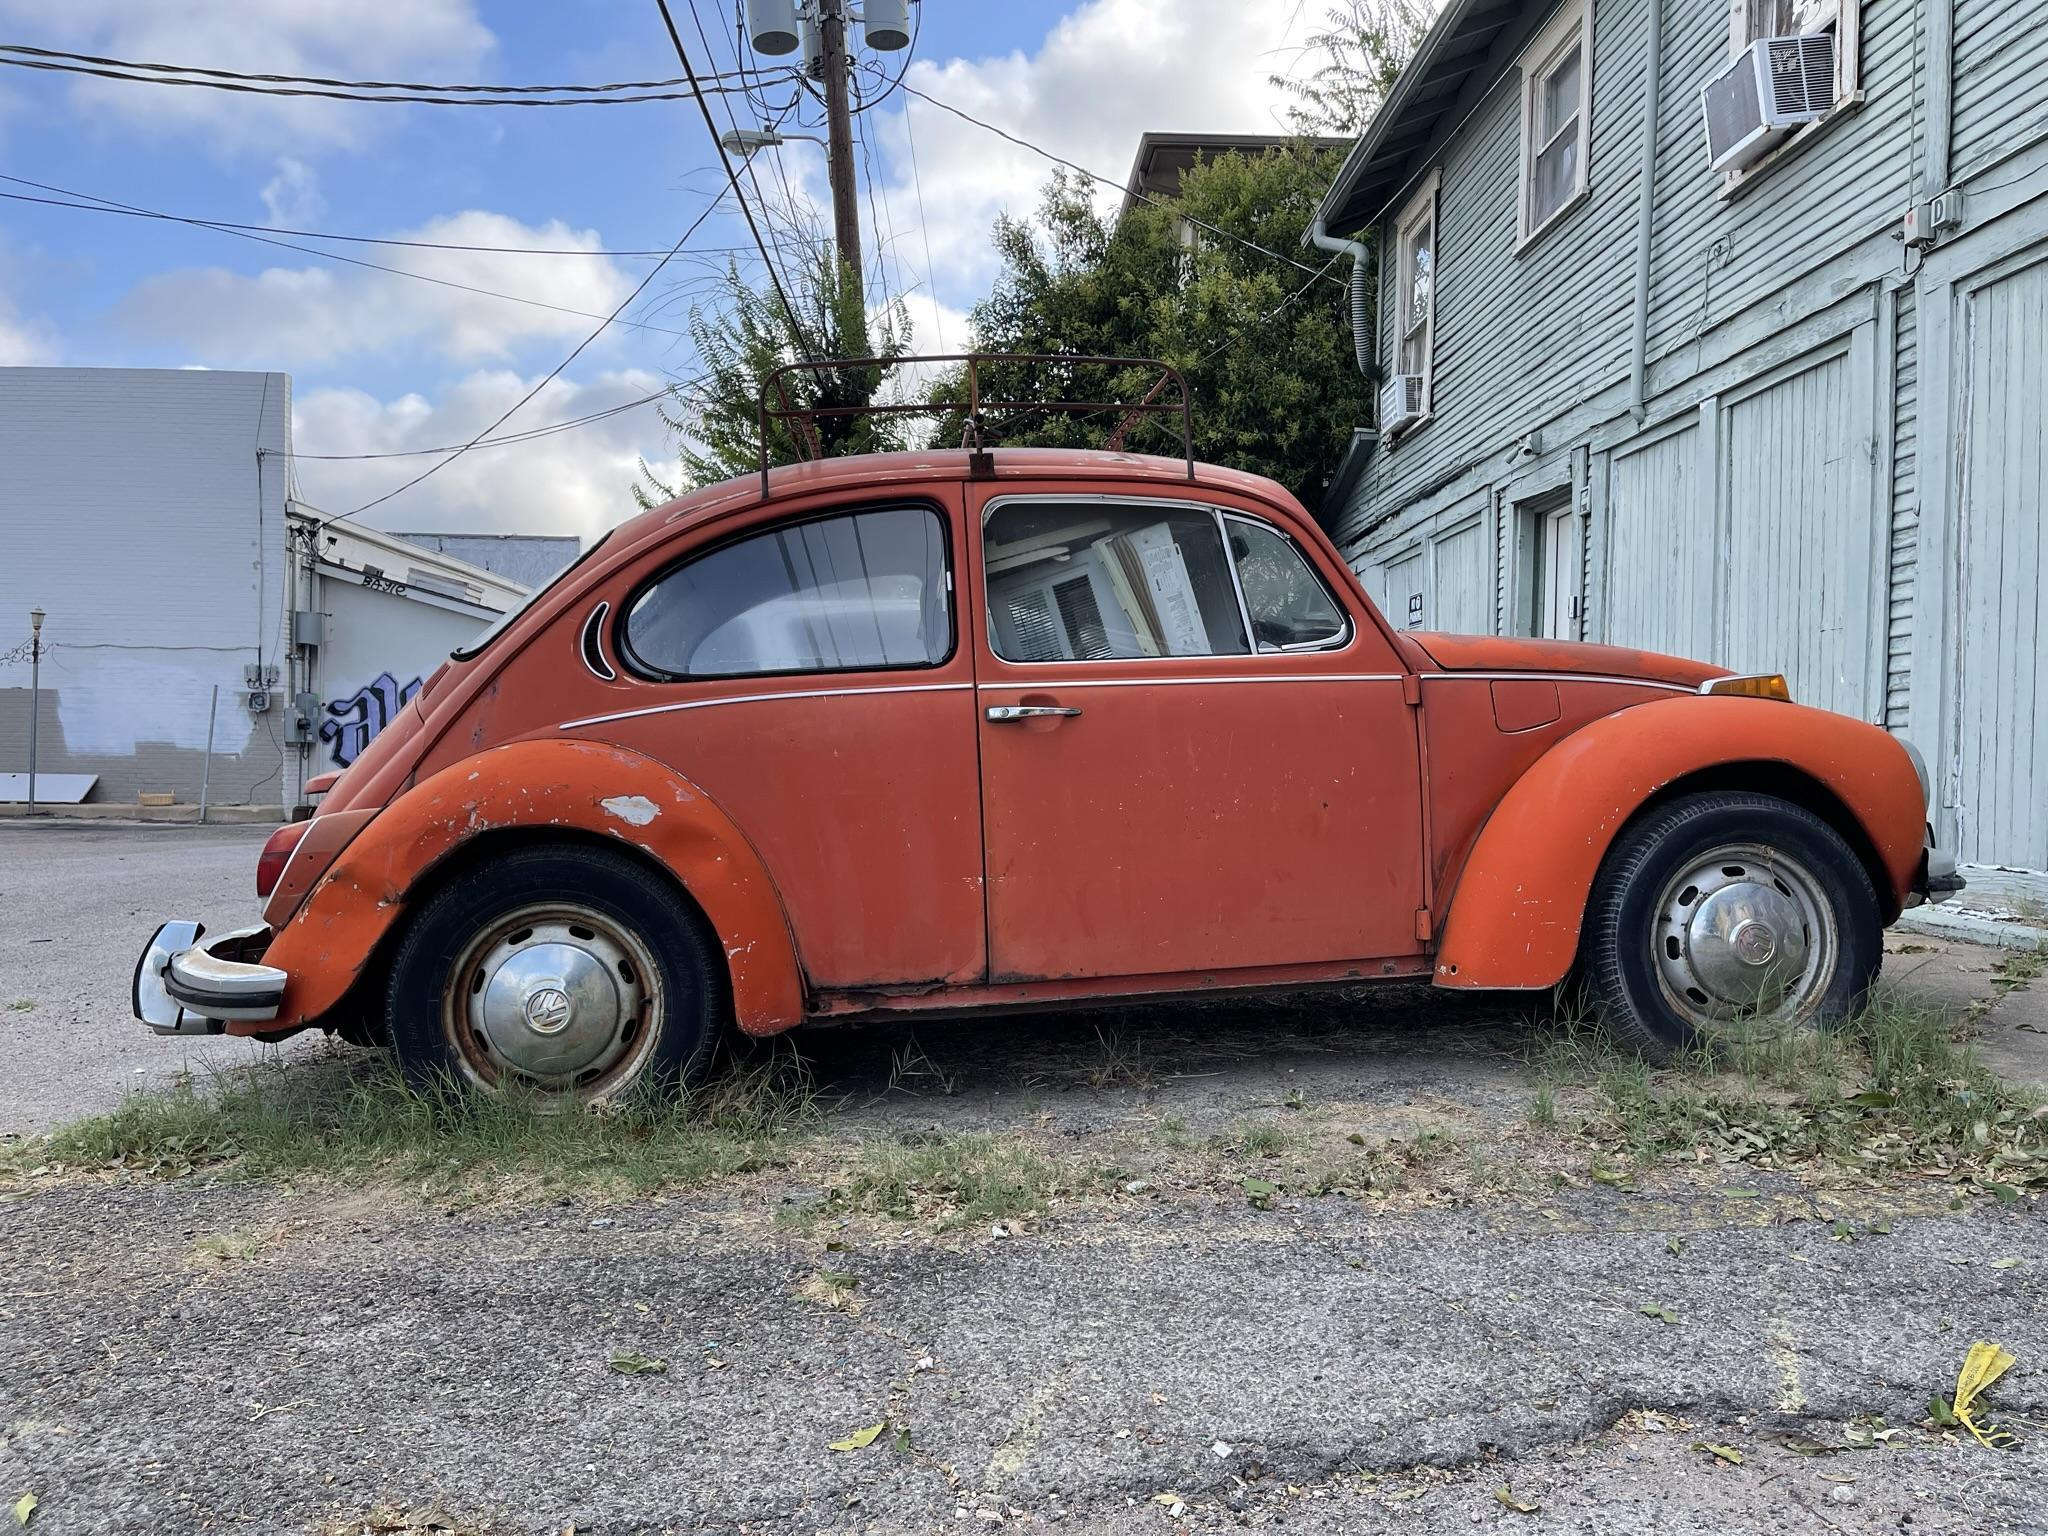

In [5]:
# display query image
from IPython.display import Image, display
display(Image(filename=image_path))


In [1]:
import requests
import sys
import pandas as pd

# Define the URL pointing to the image similarity search of a specific dataset
url = "https://app.visual-layer.com/api/v1/dataset/2348e2ec-860c-11ef-968d-76f1445e4fca/search-image-similarity"

# Define parameters
params = {
    'entity_type': 'IMAGES',
    'bounding_box': '0,0,2048,1536',
}

# points to a local image
image_path = "image_file.jpg"  # Update with your actual image path

# Open the image file in binary mode
with open(image_path, 'rb') as image_file:
    # prepare payload for query
    files = {'file': ('image_file.jpg', image_file, 'image/jpeg')}
    
    # Send the POST request
    response = requests.post(url, files=files, params=params)

# Print the response
if response.status_code == 200:
    print("Response:", response.json())
else:
    print(f"Error: {response.status_code} - {response.text}")




Response: {'anchor_media_id': 'ad195246-d403-11ef-9529-56f4225607a1', 'anchor_type': 'UPLOAD'}


# Given anchor media id get details of images withint this list

In [14]:
create_embedding_res = response.json()
anchor_media_id = create_embedding_res["anchor_media_id"]
anchor_type = create_embedding_res["anchor_type"]

# point to the exploration API
url2 = "https://app.visual-layer.com/api/v1/explore/2348e2ec-860c-11ef-968d-76f1445e4fca"

params2 = {
   'anchor_media_id': anchor_media_id,
   "entity_type": "IMAGES",
   "anchor_type": anchor_type,
   "threshold": '0'
}

# Send the GET request
response2 = requests.get(url2, params=params2)

# Print the response
if response2.status_code == 200:
    print("Response:", response2.json())
else:
    print(f"Error: {response2.status_code} - {response2.text}")
    sys.exit(1)
explore_res = response2.json()['clusters']['previews']



Response: {'clusters': [{'cluster_id': '9a205a5e-f8a0-48be-83a3-b4c4b7437d7a', 'type': 'IMAGES', 'n_images': 85, 'n_objects': -1, 'n_videos': -1, 'n_frames': -1, 'size_display_value': '0B', 'similarity_threshold': '0', 'previews': [{'type': 'IMAGE', 'media_id': '31ae21e5-4ebf-46f6-85a3-b604089baf80', 'media_uri': 'https://d2iycffepdu1yp.cloudfront.net/2348e2ec-860c-11ef-968d-76f1445e4fca/11/31ae21e5-4ebf-46f6-85a3-b604089baf80.jpg', 'media_thumb_uri': 'https://d2iycffepdu1yp.cloudfront.net/2348e2ec-860c-11ef-968d-76f1445e4fca/11/thumbs_31ae21e5-4ebf-46f6-85a3-b604089baf80.jpg.webp', 'caption': "An outdoor side-view of a parked orange Volkswagen Beetle car facing toward the right, the car appears aged, showing signs of dirt and damage over the years, The paint on the exterior also doesn't appear to be the same shade as most parts of the car are dark and some areas are lighter. The car is parked on a cracked street with some grass sprouting through the cracks, there are buildings around 

TypeError: list indices must be integers or slices, not str

In [15]:
explore_res

[{'cluster_id': '9a205a5e-f8a0-48be-83a3-b4c4b7437d7a',
  'type': 'IMAGES',
  'n_images': 85,
  'n_objects': -1,
  'n_videos': -1,
  'n_frames': -1,
  'size_display_value': '0B',
  'similarity_threshold': '0',
  'previews': [{'type': 'IMAGE',
    'media_id': '31ae21e5-4ebf-46f6-85a3-b604089baf80',
    'media_uri': 'https://d2iycffepdu1yp.cloudfront.net/2348e2ec-860c-11ef-968d-76f1445e4fca/11/31ae21e5-4ebf-46f6-85a3-b604089baf80.jpg',
    'media_thumb_uri': 'https://d2iycffepdu1yp.cloudfront.net/2348e2ec-860c-11ef-968d-76f1445e4fca/11/thumbs_31ae21e5-4ebf-46f6-85a3-b604089baf80.jpg.webp',
    'caption': "An outdoor side-view of a parked orange Volkswagen Beetle car facing toward the right, the car appears aged, showing signs of dirt and damage over the years, The paint on the exterior also doesn't appear to be the same shade as most parts of the car are dark and some areas are lighter. The car is parked on a cracked street with some grass sprouting through the cracks, there are building

In [32]:
import pandas as pd
# Extract the previews list
previews = explore_res[0]['previews']

# Convert to a DataFrame
df = pd.DataFrame(previews)

In [33]:
df

,type,media_id,media_uri,media_thumb_uri,caption,image_id,image_uri,bounding_box,file_name,original_uri,video_uri,frame_timestamp,labels,user_tags,relevance_score,relevance_score_type
0,IMAGE,31ae21e5-4ebf-46f6-85a3-b604089baf80,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,An outdoor side-view of a parked orange Volksw...,31ae21e5-4ebf-46f6-85a3-b604089baf80,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,qual_dev_00004.jpg,qual_dev_00004.jpg,,None,None,None,0.000000,cosine_distance
1,IMAGE,41795748-c719-49d6-91b5-71e7308a38c2,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,A side view of a faded red Datsun 2000 Roadste...,41795748-c719-49d6-91b5-71e7308a38c2,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,test_03005.jpg,test_03005.jpg,,None,None,None,0.164622,cosine_distance
2,IMAGE,2bde3bf4-ad6f-43d0-867b-c36f0471d57a,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,A three-quarter view of the front and driver's...,2bde3bf4-ad6f-43d0-867b-c36f0471d57a,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,test_04924.jpg,test_04924.jpg,,None,None,None,0.179516,cosine_distance
3,IMAGE,5f1edfe5-038a-4ced-a551-d833a8f85e58,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,A eye-level side view of a blue parked 2016 BM...,5f1edfe5-038a-4ced-a551-d833a8f85e58,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,train_08367.jpg,train_08367.jpg,,None,None,None,0.191733,cosine_distance
4,IMAGE,486dc6eb-9e49-4670-ae53-7d623d82f19a,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,A slightly downward tilted side view of a dark...,486dc6eb-9e49-4670-ae53-7d623d82f19a,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,train_08041.jpg,train_08041.jpg,,None,None,None,0.192709,cosine_distance
5,IMAGE,0bb58785-9bcf-4016-9980-66b2df243aa8,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,A medium side view of a royal blue BMW parked ...,0bb58785-9bcf-4016-9980-66b2df243aa8,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,test_01810.jpg,test_01810.jpg,,None,None,None,0.197410,cosine_distance
6,IMAGE,ace7d737-483d-4850-acd8-3425e97f0571,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,An outdoor two-thirds shot of the rear driver ...,ace7d737-483d-4850-acd8-3425e97f0571,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,test_00567.jpg,test_00567.jpg,,None,None,None,0.197468,cosine_distance
7,IMAGE,f7022c58-1734-4166-9e3b-341345baa0be,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,A late 1970s MG MGB is seen parked on the side...,f7022c58-1734-4166-9e3b-341345baa0be,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,train_02530.jpg,train_02530.jpg,,None,None,None,0.201690,cosine_distance
8,IMAGE,086f5719-7263-4899-b63c-471d69f22f4e,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,A three-quarter shot of the passenger side of ...,086f5719-7263-4899-b63c-471d69f22f4e,https://d2iycffepdu1yp.cloudfront.net/2348e2ec...,None,train_05799.jpg,train_05799.jpg,,None,None,None,0.207761,cosine_distance


In [ ]:
#display the first image

In [37]:
display(Image(url=df['media_uri'].values[1]))